# **Credit Card Approval Prediction Model**

## **Business Problem**

---

We need to find out how we can effectively predict if an individual should be given credit card or it should be rejected. Offering credit card involves great risk of losing money for financial institutions, therefore doing a thorough research and having an accurate prediction model that can predit whether a customer is credit worthy or not, plays a vital role in the process.

> **Questions to Answer**

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?  

>My proposal is important in today's world because there are a lot of uncertainities in today's world where people are losing jobs every now and then and liabilities are increasing, therefore it is important to check the credit worthiness of the individual looking at every aspect of their profile to decide whether they should be allowed to take credit card or not.

2. How is it going to impact the banking sector?

> Credit cards are just like short term loans, therefore, if the customer is worthy enough, they can give business and growth to the banks. If they are incorrecly identified as worthy of credit, they can lead to default and loss of money for banks.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

> Customer's profile is very dynamic. One can't simply take a look at the customer's profile and decide if they are eligible for credit. The Machine Learning model goes through many checks and it runs through every aspect before making the prediction. Therefore the credit defaults can be minimised to a great extent in future as the customer base if increasing every day and it takes a lot of time to check and evaluate everything manually when we have less time in today's world.

## **Approach**

---

Predicting credit card approval involves building a classification model to determine whether an individual's application should be approved or not. Here are some of the steps taken in this project:

1. **Data Exploration and Cleaning:**
* *Explore the distribution of the target variable ('Credit_Card_Approval') to understand the class balance.*
* *Check for missing values in other relevant columns.*
* *Explore the distributions and relationships between features and the target variable.*

2. **Feature Engineering:**

* *Extract relevant features that might impact credit card approval.*
* *Convert categorical variables into a suitable format for modeling (e.g., one-hot encoding).*
* *Transform numerical variables if needed (e.g., scaling).*

3. **Train-Test Split:**

* *Split the dataset into training and testing sets to evaluate the model's performance on unseen data.*

4. **Model Selection:**

* *Choose a classification algorithm based on the data characteristics. Common choices include logistic regression, decision trees, random forests, and gradient boosting methods.*
* *Experiment with different algorithms and hyperparameters to find the model that performs best for the specific case.*

5. **Model Training:**

* *Train the chosen model on the training set.*

6. **Model Evaluation:**

* *Evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall and F1-score*
* *Consider the business implications of false positives and false negatives.*

8. **Hyperparameter Tuning:**

* *Fine-tune the hyperparameters of the model to improve performance.*


## **Data Exploration and Cleaning**

---

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
data1 = pd.read_csv("/content/drive/MyDrive/Data_Analysis/OdinSchool/EDA+ML Capstone/Capstone1/Dataset/Credit_card.csv")

data2 = pd.read_csv("/content/drive/MyDrive/Data_Analysis/OdinSchool/EDA+ML Capstone/Capstone1/Dataset/Credit_card_label.csv")

data = pd.merge(data1, data2, on='Ind_ID', how='inner')

data2.shape

(1548, 2)

In [3]:
# Checking the size of dataset
data.shape

(1548, 19)

In [4]:
# Getting first 5 entries
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
# Getting last 5 entries
data.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


<Axes: >

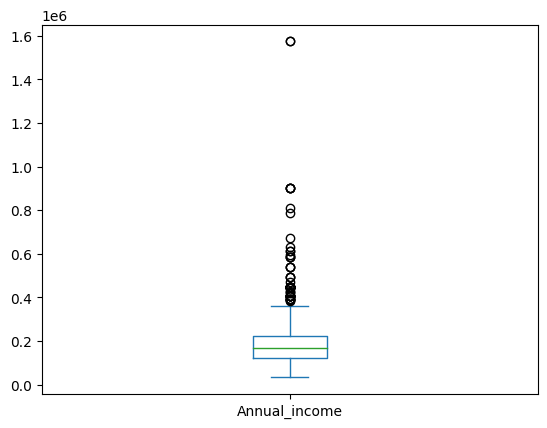

In [6]:
data["Annual_income"].plot(kind="box")

<Axes: >

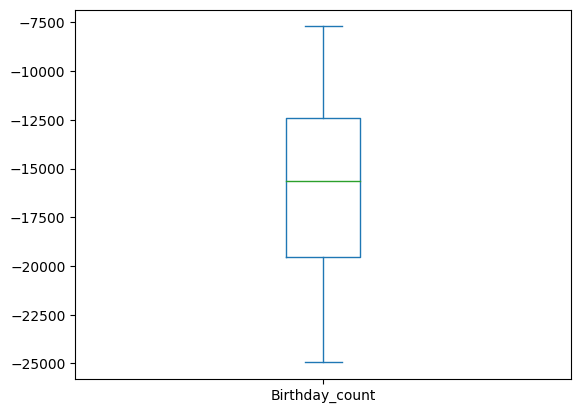

In [7]:
data["Birthday_count"].plot(kind="box")

<Axes: >

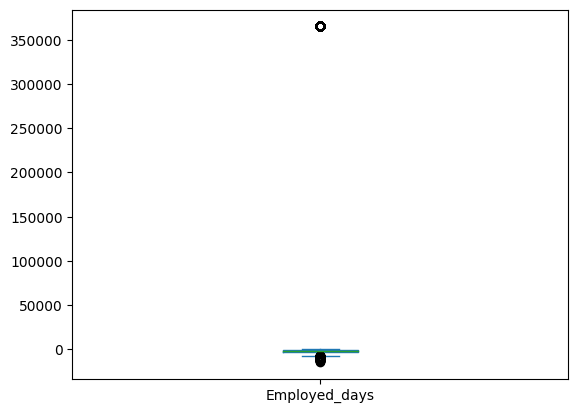

In [8]:
data["Employed_days"].plot(kind="box")

In [9]:
# Checking number of records in each column, nulls and Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

***Observations***:
1.  **GENDER, Annual_Income,Birthday_count and Type_Occupation** columns has missing values.
2. **Numerical Variables:** Ind_ID, CHILDREN, Annual_Income, Birthday_count, Employed_days, Mobile_phone, Work_phone, Phone, EMAIL_ID, Family_Members, label
3. **Categorical Variables:** GENDER, Car_Owner, Property_Owner, Type_Income, EDUCATION, Marital_status, Housing_type, Type_Occupation
4. Type_Occupation has **31.5%** missing values

In [10]:
# Checking if dataset has duplicates
data.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [11]:
# Calculating the missing values in dataset
(data.isnull().sum()/(len(data)))*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

Type_Occupation has most significant number of missing values

In [12]:
# Converting Birthday_count into age
data['Birthday_count'] = data['Birthday_count'].abs()
data['Age'] = data['Birthday_count'] / 365.25

median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)
data['Age'] = data['Age'].astype(int)
data.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,NaN,2,1,51
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,2,1,37
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,42
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,2,1,37
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,NaN,2,1,37


Age column data type is converted to integer after replacing the null values with median age

In [13]:
# Converting Employed days into Tenure after making the values positve
data['Employed_days'] = data['Employed_days'].abs()
data['Tenure_of_Employment'] = data['Employed_days'] / 365.25

# Since tenure can be be in decimals, hence, converting the column into float data type
data['Tenure_of_Employment'] = data['Tenure_of_Employment'].astype(float).round(1)


In [14]:
# Checking if the tenure got calculated correctly
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,42,1.6
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NaN,2,1,37,1.6


We see some of the extreme values in tenure of employment hence it appears that our data has outliers that are entered incorrectly, for example, an individual can't have 1000 years of experience

In [15]:
# Since Occupation type may be useful for the prediction, we can't drop the column, hence, filling the missing values with NA
data['Type_Occupation'].fillna('NA', inplace=True)
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,42,1.6
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6


In [16]:
# Filling missing values in Annual Income as well

median_income = data['Annual_income'].median()
data['Annual_income'].fillna(median_income, inplace=True)

data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6


In [17]:
# Finding out the missing values in Gender
missing_values = data['GENDER'].isnull()
rows_with_missing_values = data[missing_values]
rows_with_missing_values

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
28,5025127,NaN,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,...,3350,1,0,0,0,High skill tech staff,2,1,30,9.2
82,5068651,NaN,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,...,1905,1,0,0,0,Core staff,1,1,52,5.2
143,5126278,NaN,N,N,0,162000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,58,1000.0
171,5149192,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,...,502,1,0,1,1,Core staff,3,1,26,1.4
188,5054058,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,...,4686,1,0,1,0,Managers,3,0,41,12.8
240,5028615,NaN,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,...,2152,1,0,1,0,Sales staff,1,0,29,5.9


We see there are 7 records missing in Gender column

In [18]:
# Imputing the missing values in Gender column with most frequest repeat values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data['GENDER'] = imputer.fit_transform(data[['GENDER']])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ind_ID                1548 non-null   int64  
 1   GENDER                1548 non-null   object 
 2   Car_Owner             1548 non-null   object 
 3   Propert_Owner         1548 non-null   object 
 4   CHILDREN              1548 non-null   int64  
 5   Annual_income         1548 non-null   float64
 6   Type_Income           1548 non-null   object 
 7   EDUCATION             1548 non-null   object 
 8   Marital_status        1548 non-null   object 
 9   Housing_type          1548 non-null   object 
 10  Birthday_count        1526 non-null   float64
 11  Employed_days         1548 non-null   int64  
 12  Mobile_phone          1548 non-null   int64  
 13  Work_Phone            1548 non-null   int64  
 14  Phone                 1548 non-null   int64  
 15  EMAIL_ID             

Now we see that there are no null values in our dataset and our data has the right data types. We have also transformed our data into meaningful form

In [19]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Tenure_of_Employment
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,586,1,1,1,0,NA,2,1,37,1.6


In [20]:
# Dropping the non useful columns for prediction model
data.drop(columns = ['Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], inplace=True)


In [21]:
# Renaming the columns and checking the columns names after rename

new_column_names = {
    'Ind_ID':'IndID',
    'GENDER': 'Gender',
    'Car_Owner': 'CarOwner',
    'Propert_Owner': 'PropertyOwner',
    'CHILDREN': 'Children',
    'Annual_income': 'AnnualIncome',
    'Type_Income': 'IncomeType',
    'EDUCATION': 'Education',
    'Marital_status': 'MaritalStatus',
    'Housing_type': 'HousingType',
    'Type_Occupation': 'OccupationType',
    'Family_Members': 'FamilyMembers',
    'Tenure_of_Employment': 'Experience(Years)',
    'label': 'CreditCardApproval'
}

data.rename(columns=new_column_names, inplace=True)

data.columns

Index(['IndID', 'Gender', 'CarOwner', 'PropertyOwner', 'Children',
       'AnnualIncome', 'IncomeType', 'Education', 'MaritalStatus',
       'HousingType', 'OccupationType', 'FamilyMembers', 'CreditCardApproval',
       'Age', 'Experience(Years)'],
      dtype='object')

In [22]:
data.head()

,IndID,Gender,CarOwner,PropertyOwner,Children,AnnualIncome,IncomeType,Education,MaritalStatus,HousingType,OccupationType,FamilyMembers,CreditCardApproval,Age,Experience(Years)
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,NA,2,1,51,1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,42,1.6
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NA,2,1,37,1.6


In [23]:
# Gender: Gender may have an impact on credit card approval
# Education: Higher education levels might be associated with better creditworthiness
# PropertyOwner: Owning property may be considered in credit evaluations
# CarOwner: Owning a car may be a factor in creditworthiness
# Children: The number of children may be a factor
# AnnualIncome: Higher income might positively impact creditworthiness
# IncomeType: The type of income (e.g., pensioner, commercial associate) may be relevant
# MaritalStatus: Marital status may be considered in credit assessments
# HousingType: The type of housing may be relevant
# OccupationType: The type of occupation could impact credit card approval
# FamilyMembers: The number of family members might be considered
# Age: Age could influence creditworthiness

In [24]:
# Finding out average income
avg_income = data['AnnualIncome'].mean()
min_income = data['AnnualIncome'].min()
max_income = data['AnnualIncome'].max()
median_income = data['AnnualIncome'].median()
mode_income = data['AnnualIncome'].mode()

avg_family = data['FamilyMembers'].mean()

print('Average Income: ', avg_income)
print('Min Income: ', min_income)
print('Max Income: ', max_income)
print('Median Income: ', median_income)
print('Mode Income: ', mode_income)
print('Avg Family: ', avg_family)


Average Income:  191029.375
Min Income:  33750.0
Max Income:  1575000.0
Median Income:  166500.0
Mode Income:  0    135000.0
Name: AnnualIncome, dtype: float64
Avg Family:  2.161498708010336


In [25]:
# Checking of number of family members plays a relevant role in our target feature
count_of_family_greaterOrEqual_two = data['FamilyMembers'].apply(lambda x: 1 if x >= 2 else 0).sum()
count_of_family_greaterOrEqual_two

1214

In [26]:
# Converting the values of CreditCardApproval into meaningful form
data['CreditCardApproval'] = data['CreditCardApproval'].apply(lambda x: 'Approved' if x == 0 else 'Rejected')

data['CreditCardApproval']

0       Rejected
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
1543    Approved
1544    Approved
1545    Approved
1546    Approved
1547    Approved
Name: CreditCardApproval, Length: 1548, dtype: object

<Axes: ylabel='Experience(Years)'>

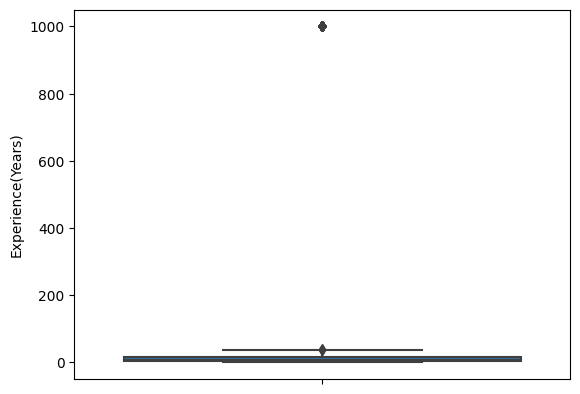

In [27]:
# Plotting the experience to find out the outliers and the data range

sns.boxplot(data, y='Experience(Years)')

We can see that there are extreme values in the dataset that would create a bias on our model.

In [28]:
# Finding out the maximum experience
print(data['Experience(Years)'].max())

1000.0


In [29]:
# Finding out the average experience after filtering the outliers
count = 0
sum = 0

for item in data['Experience(Years)']:
  if item < 1000:
     sum = sum + item
     count = count + 1
avg_exp = sum/count
print(avg_exp)

7.3003885003885


In [30]:
data.corr()

,IndID,Children,AnnualIncome,FamilyMembers,Age,Experience(Years)
IndID,1.000000,0.032535,0.031019,0.016950,-0.023236,-0.055921
Children,0.032535,1.000000,0.078543,0.890248,-0.278457,-0.219685
AnnualIncome,0.031019,0.078543,1.000000,0.051522,-0.109747,-0.159493
FamilyMembers,0.016950,0.890248,0.051522,1.000000,-0.265594,-0.238907
Age,-0.023236,-0.278457,-0.109747,-0.265594,1.000000,0.621953
Experience(Years),-0.055921,-0.219685,-0.159493,-0.238907,0.621953,1.000000


Number of children is highly correlated to FamilyMembers which makes sense, AnnualIncome is also positively correalated to number of children in family therefore we can see that the family that has more number of children has higher Annual Income as well

In [31]:
# Checking the column names in our dataset to take it forward to feed the ML model
data.columns

Index(['IndID', 'Gender', 'CarOwner', 'PropertyOwner', 'Children',
       'AnnualIncome', 'IncomeType', 'Education', 'MaritalStatus',
       'HousingType', 'OccupationType', 'FamilyMembers', 'CreditCardApproval',
       'Age', 'Experience(Years)'],
      dtype='object')

## **Train-Test Split dataset**

---

In [32]:
# Separating features and target variable
features = ['IndID', 'Gender', 'CarOwner', 'PropertyOwner', 'Children',
       'AnnualIncome', 'IncomeType', 'Education', 'MaritalStatus',
       'HousingType', 'OccupationType', 'FamilyMembers', 'Age',
       'Experience(Years)']

target = 'CreditCardApproval'

In [33]:
# Split the data into features (X) and the target variable (y)
X = data[features]
y = data[target]

In [34]:
from sklearn.model_selection import train_test_split
# Perform the train-test split (e.g., 80% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Display the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1083, 14)
Shape of X_test: (465, 14)
Shape of y_train: (1083,)
Shape of y_test: (465,)


In [36]:
# Define numerical and categorical features
numerical_features = ['AnnualIncome', 'Children', 'Age', 'FamilyMembers']
categorical_features = ['Gender', 'CarOwner', 'PropertyOwner', 'IncomeType', 'Education',
                         'MaritalStatus', 'HousingType', 'OccupationType']

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## **Model Selection**

---

We are selecting classification algorithm to train our model as the target variable has 2 possible outcomes, either 'Approved' or 'Rejected'

### **Model 1: Logistic Regression**

In [38]:
from sklearn.compose import ColumnTransformer
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

from sklearn.linear_model import LogisticRegression
# Create the pipeline with preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

The Pipeline helped in sequentially applying a list of transforms and a final estimator

In [39]:
# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', LogisticRegression())])

In [40]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

 **Logistic Regression Evaluation**

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [42]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9096774193548387
Confusion Matrix:
[[422   0]
 [ 42   1]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.91      1.00      0.95       422
    Rejected       1.00      0.02      0.05        43

    accuracy                           0.91       465
   macro avg       0.95      0.51      0.50       465
weighted avg       0.92      0.91      0.87       465



> **Observations:**

The accuracy is approximately 90.96%, indicating that the model correctly predicted the class of the instances in the test set 90.96% of the time.

 **Logistic Regression Hyperparameter Tuning**

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'classifier__max_iter': [100, 200, 300],  # Maximum number of iterations
}

# Create the pipeline with preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set using the best model
y_pred_tuned = grid_search.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

print(f"Accuracy after hyperparameter tuning: {accuracy_tuned}")
print(f"Confusion Matrix after hyperparameter tuning:\n{conf_matrix_tuned}")
print(f"Classification Report after hyperparameter tuning:\n{classification_rep_tuned}")


Best Parameters: {'classifier__C': 0.001, 'classifier__max_iter': 100}
Accuracy after hyperparameter tuning: 0.9075268817204301
Confusion Matrix after hyperparameter tuning:
[[422   0]
 [ 43   0]]
Classification Report after hyperparameter tuning:
              precision    recall  f1-score   support

    Approved       0.91      1.00      0.95       422
    Rejected       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



> **Observations:**

The accuracy of the model after hyperparameter tuning is approximately 90.75%, indicating that the model correctly predicted the class of the instances in the test set 90.75% of the time. There is no improvement in the results even after the tuning

### **Model 2: Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [46]:
# Create the pipeline with preprocessing and classification (Random Forest)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [47]:
# Fit the Random Forest model
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [48]:
# Make predictions on the test set
y_pred_rf = pipeline_rf.predict(X_test)

In [49]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Random Forest Classifier Results:
Accuracy: 0.9247311827956989
Confusion Matrix:
[[415   7]
 [ 28  15]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.98      0.96       422
    Rejected       0.68      0.35      0.46        43

    accuracy                           0.92       465
   macro avg       0.81      0.67      0.71       465
weighted avg       0.91      0.92      0.91       465



**Random Forest Evaluation**

> **Observations:**

The accuracy is approximately 92.47%, indicating that the model correctly predicted the class of the instances in the test set 92.47% of the time.

**Random Forest Hyperparameter Tuning**

In [50]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)

# Make predictions on the test set using the best model
y_pred_rf_tuned = grid_search_rf.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Random Forest Classifier Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_rf_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_rf_tuned}")
print(f"Classification Report:\n{classification_rep_rf_tuned}")

Best Parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Classifier Results after Hyperparameter Tuning:
Accuracy: 0.9247311827956989
Confusion Matrix:
[[415   7]
 [ 28  15]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.98      0.96       422
    Rejected       0.68      0.35      0.46        43

    accuracy                           0.92       465
   macro avg       0.81      0.67      0.71       465
weighted avg       0.91      0.92      0.91       465



> **Observations:**

The accuracy of the model after hyperparameter tuning is approximately 92.47%, which remained unchanged.

### **Model 3: Gradient Boosting**

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
# Create the pipeline with preprocessing and classification (Gradient Boosting)
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [53]:
# Fit the Gradient Boosting model
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [54]:
# Make predictions on the test set
y_pred_gb = pipeline_gb.predict(X_test)

**Gradient Boosting Evaluation**

In [55]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")
print(f"Classification Report:\n{classification_rep_gb}")

Gradient Boosting Classifier Results:
Accuracy: 0.9096774193548387
Confusion Matrix:
[[417   5]
 [ 37   6]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.92      0.99      0.95       422
    Rejected       0.55      0.14      0.22        43

    accuracy                           0.91       465
   macro avg       0.73      0.56      0.59       465
weighted avg       0.88      0.91      0.88       465



> **Observations:**

The accuracy is approximately 90.96%, indicating that the model correctly predicted the class of the instances in the test set 90.96% of the time

**Gradient Boosting Hyperparameter Tuning**

In [56]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

# Create GridSearchCV
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_

# Print the best parameters
print("Best Parameters for Gradient Boosting:", best_params_gb)

# Make predictions on the test set using the best model
y_pred_gb_tuned = grid_search_gb.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
conf_matrix_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
classification_rep_gb_tuned = classification_report(y_test, y_pred_gb_tuned)

print("Gradient Boosting Classifier Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_gb_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_gb_tuned}")
print(f"Classification Report:\n{classification_rep_gb_tuned}")

Best Parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
Gradient Boosting Classifier Results after Hyperparameter Tuning:
Accuracy: 0.9290322580645162
Confusion Matrix:
[[412  10]
 [ 23  20]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.95      0.98      0.96       422
    Rejected       0.67      0.47      0.55        43

    accuracy                           0.93       465
   macro avg       0.81      0.72      0.75       465
weighted avg       0.92      0.93      0.92       465



> **Observations:**


The accuracy reduced a little

### **Model 4: k-Nearest Neighbors (KNN)**

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Create the pipeline with preprocessing and classification (KNN)
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [59]:
# Fit the KNN model
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['AnnualIncome', 'Children',
                                                   'Age', 'FamilyMembers']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CarOwner',
                                                   'PropertyOwner',
                                                   'IncomeType', 'Education',
                                                   'MaritalStatus',
                                                   'HousingType',
                                                   'OccupationType'])])),
                ('classifier', KNeighborsClassifier())])

In [60]:
# Make predictions on the test set
y_pred_knn = pipeline_knn.predict(X_test)

**KNN Evaluation**

In [61]:
# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Classifier Results:")
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{classification_rep_knn}")

K-Nearest Neighbors (KNN) Classifier Results:
Accuracy: 0.8838709677419355
Confusion Matrix:
[[408  14]
 [ 40   3]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.91      0.97      0.94       422
    Rejected       0.18      0.07      0.10        43

    accuracy                           0.88       465
   macro avg       0.54      0.52      0.52       465
weighted avg       0.84      0.88      0.86       465



> **Observations:**

The accuracy is approximately 88.38%, indicating that the model correctly predicted the class of the instances in the test set 88.38% of the time.


**KNN Hyperparameter Tuning**

In [62]:
# Define the parameter grid for kNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

# Create GridSearchCV
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

# Print the best parameters
print("Best Parameters for k-Nearest Neighbors (kNN):", best_params_knn)

# Make predictions on the test set using the best model
y_pred_knn_tuned = grid_search_knn.predict(X_test)

# Evaluate the model with hyperparameter tuning
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
classification_rep_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

print("k-Nearest Neighbors (kNN) Classifier Results after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_knn_tuned}")
print(f"Confusion Matrix:\n{conf_matrix_knn_tuned}")
print(f"Classification Report:\n{classification_rep_knn_tuned}")

Best Parameters for k-Nearest Neighbors (kNN): {'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'distance'}
k-Nearest Neighbors (kNN) Classifier Results after Hyperparameter Tuning:
Accuracy: 0.9053763440860215
Confusion Matrix:
[[405  17]
 [ 27  16]]
Classification Report:
              precision    recall  f1-score   support

    Approved       0.94      0.96      0.95       422
    Rejected       0.48      0.37      0.42        43

    accuracy                           0.91       465
   macro avg       0.71      0.67      0.68       465
weighted avg       0.90      0.91      0.90       465



> **Observations:**


The accuracy has improved to 90.53% after performing hyperparameter tuning


## **Conclusion**

---

Evaluating each model once again to see which one should be picked for deployment


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_tuned)
precision_lr = precision_score(y_test, y_pred_tuned, pos_label='Approved')
recall_lr = recall_score(y_test, y_pred_tuned, pos_label='Approved')
f1_lr = f1_score(y_test, y_pred_tuned, pos_label='Approved')

# Display results for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Logistic Regression Metrics:
Accuracy: 0.9075268817204301
Precision: 0.9075268817204301
Recall: 1.0
F1 Score: 0.95152198421646


In [65]:
# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf = precision_score(y_test, y_pred_rf_tuned, pos_label='Approved')
recall_rf = recall_score(y_test, y_pred_rf_tuned,  pos_label='Approved')
f1_rf = f1_score(y_test, y_pred_rf_tuned,  pos_label='Approved')

# Display results
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Random Forest Metrics:
Accuracy: 0.9247311827956989
Precision: 0.9367945823927766
Recall: 0.9834123222748815
F1 Score: 0.9595375722543353


In [66]:
# Evaluate k-Nearest Neighbors (kNN) model
accuracy_knn = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn = precision_score(y_test, y_pred_knn_tuned ,pos_label='Approved')
recall_knn = recall_score(y_test, y_pred_knn_tuned, pos_label='Approved')
f1_knn = f1_score(y_test, y_pred_knn_tuned, pos_label='Approved')

print("\nk-Nearest Neighbors (kNN) Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")


k-Nearest Neighbors (kNN) Metrics:
Accuracy: 0.9053763440860215
Precision: 0.9375
Recall: 0.9597156398104265
F1 Score: 0.9484777517564403


In [67]:
# Evaluate Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb_tuned)
precision_gb = precision_score(y_test, y_pred_gb_tuned, pos_label='Approved')
recall_gb = recall_score(y_test, y_pred_gb_tuned, pos_label='Approved')
f1_gb = f1_score(y_test, y_pred_gb_tuned, pos_label='Approved')

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")


Gradient Boosting Metrics:
Accuracy: 0.9290322580645162
Precision: 0.9471264367816092
Recall: 0.976303317535545
F1 Score: 0.9614935822637107


**Plotting the modelwise metrics to visually compare the difference**

In [68]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'kNN', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_gb],
    'Precision': [precision_lr, precision_rf, precision_knn, precision_gb],
    'Recall': [recall_lr, recall_rf, recall_knn, recall_gb],
    'F1 Score': [f1_lr, f1_rf, f1_knn, f1_gb]
}

df = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for plotting
df_melted = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Value')

# Create a grouped bar chart using Plotly Express
fig = px.bar(df_melted, x='Model', y='Value', color='Metric',
             labels={'Value': 'Metric Values'},
             title='Model Comparison Metrics',
             barmode='group')

# Show the plot
fig.show()

Here, Gradient Boost looks promising

In [69]:
# Applying cross validation  to see if our model is overfitting or underfitting

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer

# Define models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
gradient_boosting_model = GradientBoostingClassifier()

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies different transformations to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 # Create pipelines for each model
logistic_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                                ('classifier', logistic_regression_model)])

random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('classifier', random_forest_model)])

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', knn_model)])

gradient_boosting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                              ('classifier', gradient_boosting_model)])

models = [
    ('Logistic Regression', logistic_regression_pipeline),
    ('Random Forest', random_forest_pipeline),
    ('k-Nearest Neighbors', knn_pipeline),
    ('Gradient Boosting', gradient_boosting_pipeline)
]

# Use StratifiedKFold for classification tasks to ensure class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model and apply k-fold cross-validation
for model_name, model in models:
    # Perform cross-validation and obtain scores
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Print the results
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    print()


Model: Logistic Regression
Cross-Validation Accuracy: 0.8763 (+/- 0.0052)

Model: Random Forest
Cross-Validation Accuracy: 0.9021 (+/- 0.0035)

Model: k-Nearest Neighbors
Cross-Validation Accuracy: 0.8716 (+/- 0.0037)

Model: Gradient Boosting
Cross-Validation Accuracy: 0.8744 (+/- 0.0098)



**Plotting cross validation accuracy scores for the models:**

In [88]:
model_names=  ['Logistic Regression', 'Random Forest', 'kNN', 'Gradient Boosting']
accuracies = [0.8763, 0.9021, 0.8716, 0.8744]

# Create a DataFrame for plotting
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Create a grouped bar chart using Plotly Express
fig = px.bar(df, x='Model', y='Accuracy', text='Accuracy', title='Model Comparison',
             labels={'Accuracy': 'Cross-Validation Accuracy'},
             height=500, width=1000, color='Model')

# Add data labels above the bars
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')

# Show the plot
fig.show()

Metrics shows that Random Forest Model would perform the best out of all the 4 models we trained.

# **SQL queries**

---

In [71]:
data1 = pd.read_csv("/content/drive/MyDrive/Data_Analysis/OdinSchool/EDA+ML Capstone/Capstone1/Dataset/Credit_card.csv")

data2 = pd.read_csv("/content/drive/MyDrive/Data_Analysis/OdinSchool/EDA+ML Capstone/Capstone1/Dataset/Credit_card_label.csv")

df = pd.merge(data1, data2, on='Ind_ID', how='inner')

df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [72]:
# Converting Birthday_count into age
df['Birthday_count'] = df['Birthday_count'].abs()
df['Birthday_count'] = df['Birthday_count'] / 365.25

median_age = df['Birthday_count'].median()
df['Birthday_count'].fillna(median_age, inplace=True)
df['Birthday_count'] = df['Birthday_count'].astype(int)
df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,-586,1,1,1,0,NaN,2,1


In [73]:
# Converting Employed days into Tenure after making the values positve
df['Employed_days'] = df['Employed_days'].abs()
df['Employed_days'] = df['Employed_days'] / 365.25

# Since tenure can be be in decimals, hence, converting the column into float data type
df['Employed_days'] = df['Employed_days'].astype(float).round(1)


In [74]:
# Since Occupation type may be useful for the prediction, we can't drop the column, hence, filling the missing values with NA
df['Type_Occupation'].fillna('NA', inplace=True)
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,1000.0,1,0,0,0,NA,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42,1.6,1,1,1,0,NA,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1


In [75]:
# Filling missing values in Annual Income as well

median_income = df['Annual_income'].median()
df['Annual_income'].fillna(median_income, inplace=True)

df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,1000.0,1,0,0,0,NA,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42,1.6,1,1,1,0,NA,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1


In [76]:
# Imputing the missing values in Gender column with most frequest repeat values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['GENDER'] = imputer.fit_transform(df[['GENDER']])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   int64  
 11  Employed_days    1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [77]:
# df=pd.get_dummies(data,columns=["sex","smoker","day","time"], drop_first=True)

In [78]:
import duckdb
conn=duckdb.connect()

In [79]:
conn.register("df",df)

In [80]:
conn.execute("select * from df").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,1000.0,1,0,0,0,NA,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42,1.6,1,1,1,0,NA,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1.6,1,1,1,0,NA,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,32,6.0,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28,3.3,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36,6.8,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,41,1.8,1,1,1,0,Drivers,2,0


1. Group the customers based on their income type and find the average of their annual income.

In [81]:
conn.execute("select Type_Income as Income_Type, AVG(Annual_income) as Average_Income from df Group by Type_Income").fetchdf()

,Income_Type,Average_Income
0,Pensioner,155343.496283
1,Working,180848.210526
2,State servant,211422.413793
3,Commercial associate,233107.397260


2. Find the female owners of cars and property.

In [82]:
conn.execute("SELECT * from df WHERE GENDER = 'F' and Car_Owner	= 'Y' and Propert_Owner = 'Y' ").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51,2.7,1,1,1,0,Cooking staff,2,1
1,5018501,F,Y,Y,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,51,2.7,1,1,1,0,Cooking staff,2,1
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51,2.7,1,1,1,0,Cooking staff,2,1
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,42,0.5,1,0,1,0,NA,2,1
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,65,1000.0,1,0,0,0,NA,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,25,0.4,1,0,0,0,NA,3,0
175,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,60,1000.0,1,0,1,0,NA,2,0
176,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,34,16.0,1,0,1,0,Medicine staff,5,0
177,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,35,8.0,1,0,0,0,Accountants,3,0


3. Find the male customers who are staying with their families.

In [83]:
conn.execute("SELECT * from df WHERE GENDER = 'M' and Housing_type	= 'With parents'").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,24,2.5,1,0,0,1,NA,3,1
1,5079166,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,37,3.8,1,0,0,0,Laborers,2,1
2,5079167,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,37,3.8,1,0,0,0,Laborers,2,1
3,5079168,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,With parents,37,3.8,1,0,0,0,Laborers,2,1
4,5050729,M,Y,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,23,1.5,1,0,0,0,NA,1,0
5,5028383,M,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,With parents,31,9.1,1,0,0,0,Core staff,1,0
6,5143019,M,N,N,0,270000.0,Working,Secondary / secondary special,Married,With parents,32,1.7,1,1,1,0,Laborers,2,0
7,5067982,M,Y,Y,0,153000.0,Working,Higher education,Separated,With parents,54,20.9,1,0,0,1,Managers,1,0
8,5143573,M,Y,N,0,157500.0,Working,Incomplete higher,Married,With parents,24,2.6,1,1,0,0,Drivers,2,0
9,5038751,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,38,1.7,1,0,0,0,Drivers,4,0


4. Please list the top five people having the highest income.


In [84]:
conn.execute("SELECT *  from df ORDER BY Annual_income DESC limit 5").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,27,6.8,1,0,0,0,Managers,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,27,6.8,1,0,0,0,Managers,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,42,12.3,1,0,0,0,Laborers,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,27,2.7,1,0,0,0,Managers,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,27,2.7,1,0,0,0,Managers,4,0


5. How many married people are having bad credit?

In [85]:
conn.execute("SELECT COUNT(*) as Bad_Credit_Married from df WHERE label = 0 and Marital_status = 'Married'").fetchdf()

,Bad_Credit_Married
0,935


6. What is the highest education level and what is the total count?

In [86]:
conn.execute("select Education , Count(*) as Total_count from df GROUP BY Education").fetchdf()

,EDUCATION,Total_count
0,Incomplete higher,68
1,Academic degree,2
2,Higher education,426
3,Secondary / secondary special,1031
4,Lower secondary,21


**426 people have completed Higher Education from the total**

7. Between married males and females, who is having more bad credit?

In [87]:
conn.execute("select GENDER, count(*) as Bad_credit from df WHERE Marital_status = 'Married' and label = 0 GROUP BY GENDER").fetchdf()

,GENDER,Bad_credit
0,F,567
1,M,368


**Married females has more bad credit than married males**